In [100]:
import numpy as np
from scipy.optimize import *

import matplotlib.pylab as plt

In [101]:
class Spy:
    def __init__(self, target):
        self.target = target
        self.fun_err = []
        self.x_series = []
        
    def add_fun(self, x, ret):
        self.x_series.append(x)
        self.fun_err.append(np.linalg.norm(ret-self.target))
    
        
    def draw(self):
        plt.plot(xrange(1, len(self.fun_err) +1), self.fun_err, color='red')
        plt.show()
        self.fun_err = []
        self.x_series = []

In [102]:
spy = Spy(0.)

In [103]:
def rosen(x):
    """The Rosenbrock function"""
    ret = np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    spy.add_fun(x, ret)
    return ret

In [104]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
#x0 = [1.3, 1.2]

Optimization terminated successfully.
         Current function value: 0.000066
         Iterations: 141
         Function evaluations: 243


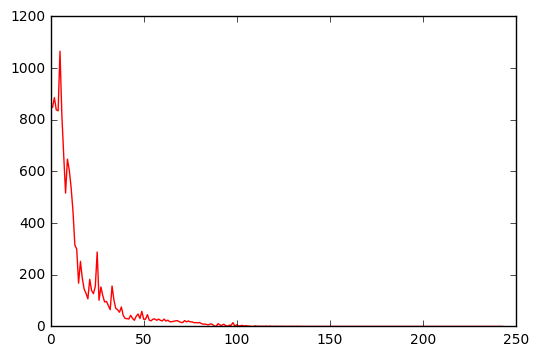

array([ 0.99910115,  0.99820923,  0.99646346,  0.99297555,  0.98600385])

In [106]:
xopt = fmin(rosen, x0)
spy.draw()
xopt

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 97
         Gradient evaluations: 97


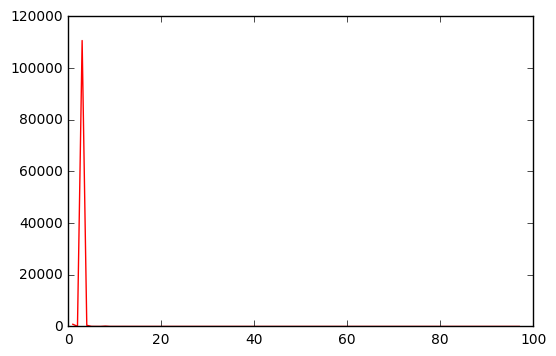

array([ 0.99999977,  0.99999954,  0.99999909,  0.99999819,  0.99999636])

In [113]:
xopt = fmin_cg(rosen, x0, fprime=rosen_der)
spy.draw()
xopt

In [108]:
fmin?

In [111]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


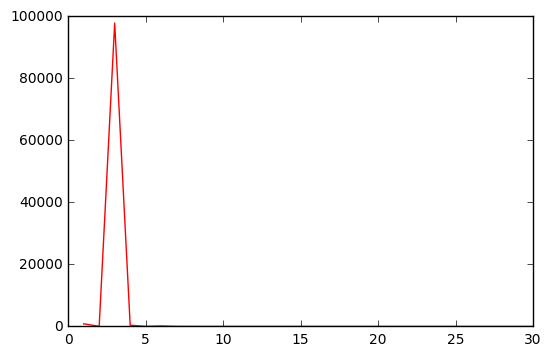

[ 1.00000004  1.0000001   1.00000021  1.00000044  1.00000092]


In [112]:
xopt = fmin_bfgs(rosen, x0, fprime=rosen_der)
spy.draw()
print xopt

In [115]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 46
         Hessian evaluations: 21


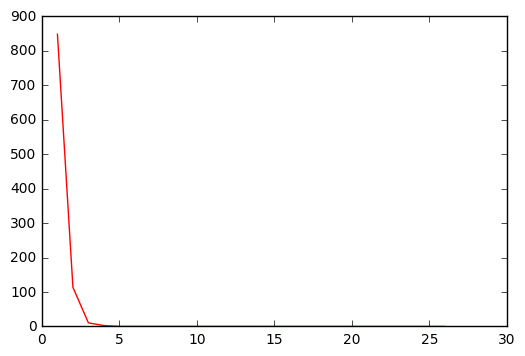

array([ 1.,  1.,  1.,  1.,  1.])

In [116]:
xopt = fmin_ncg(rosen, x0, rosen_der, fhess=rosen_hess)
spy.draw()
xopt